# FCT Unesp
Aluno: Pétrus Antonio Bárbosa Pradella

In [1]:
from myownapi.AnalyticsARIMA import AnalyticsARIMA;

analytics = AnalyticsARIMA();

dataset_file = "C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino11/cases-brazil-states.csv";

analytics.read_csv(dataset_file);
#analytics.tratarVariaveisZeradasComMediaDasOutras('Cases');
#analytics.tratarVariaveisNulasComValorEspecifico('Cases',0);

Iniciando leitura do arquivo:
 --> C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino11/cases-brazil-states.csv
Arquivo lido com sucesso!


In [5]:
analytics.df.head(10)

,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
5,2020-02-27,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
6,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
7,2020-02-28,Brazil,TOTAL,TOTAL,0,0,1,2,0,1,0.0,0.00095,0.0,NaN,NaN,NaN,NaN
8,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,2020-02-29,Brazil,TOTAL,TOTAL,0,0,0,2,0,2,0.0,0.00095,0.0,NaN,NaN,NaN,NaN


In [7]:
df = analytics.df.filter(['date', 'state', 'deaths']);
df = df.loc[df['state'] == "SP"];
df.head(3)

,date,state,deaths
0,2020-02-25,SP,0
2,2020-02-26,SP,0
4,2020-02-27,SP,0


In [8]:
analytics.setDataframe(df);
analytics.arimaDefinirColunaObjetivo(nomeDaColunaObjetivo='deaths',nomeDaColunaDeDatas='date')
analytics.aplicarARIMA(verbose=True,ARIMA_SASONALIDADE=1);


# ==============================================================================================================
# Preparando quantidade de treino.
# ==============================================================================================================


[(0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 1), (1, 0, 0, 1), (1, 0, 1, 1), (1, 1, 0, 1), (1, 1, 1, 1)]
# ==============================================================================================================
# Escolhendo a melhor combinação de parametros arima.
# ==============================================================================================================


ARIMA(0, 0, 0)x(0, 0, 0, 1)x1 - AIC:1195.3585270291248
ARIMA(0, 0, 0)x(0, 0, 1, 1)x1 - AIC:1092.3241296504477
ARIMA(0, 0, 0)x(0, 1, 0, 1)x1 - AIC:802.6371855350384
ARIMA(0, 0, 0)x(0, 1, 1, 1)x1 - AIC:749.757909400949
ARIMA(0, 0, 0)x(1, 0, 0, 1)x1 - AIC:728.0055534917512
ARIMA(0, 0, 0)x(1, 0, 1, 1)x1 - AIC:705.4123157771884
ARIMA(0, 0, 0)x(

C:\Users\Petrus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


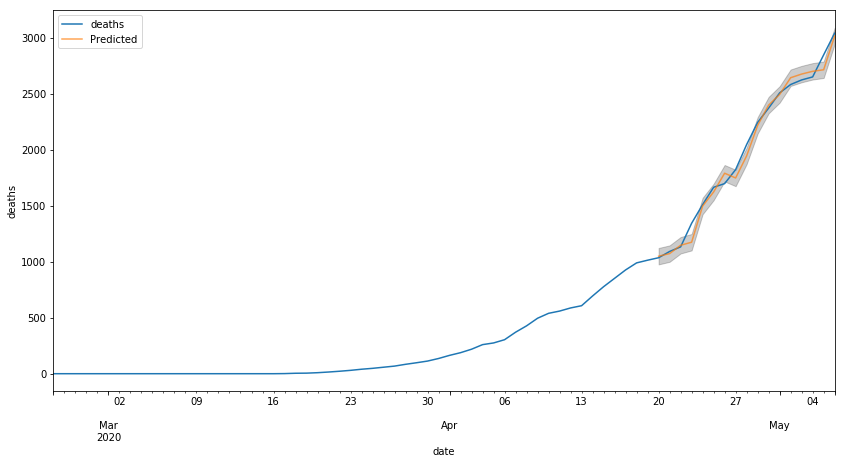

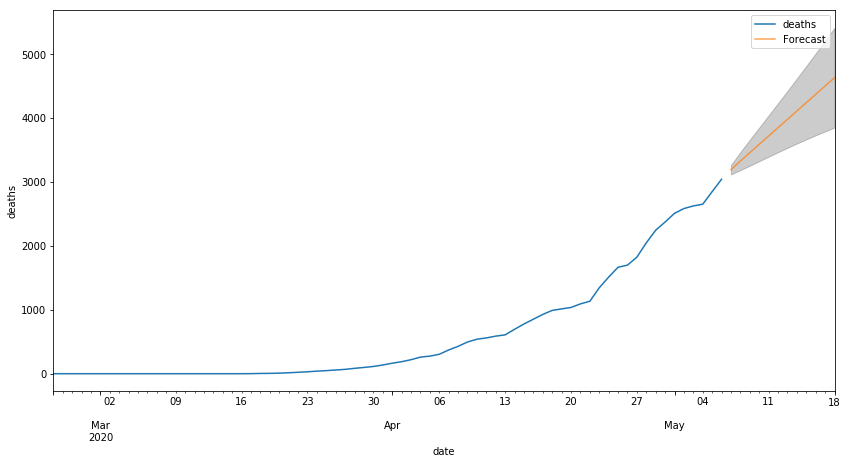

In [9]:
analytics.ARIMAPrediction('2020-04-20')
analytics.ARIMAForecast(steps=12)

In [10]:
pred = analytics.ARIMAForecastToPred(steps=12)
pred.predicted_mean

2020-05-07    3194.708980
2020-05-08    3329.329017
2020-05-09    3460.695746
2020-05-10    3591.361036
2020-05-11    3721.875088
2020-05-12    3852.356532
2020-05-13    3982.830946
2020-05-14    4113.303844
2020-05-15    4243.776415
2020-05-16    4374.248916
2020-05-17    4504.721402
2020-05-18    4635.193884
Freq: D, dtype: float64

In [11]:
pred.conf_int()


,lower deaths,upper deaths
2020-05-07,3121.226257,3268.191703
2020-05-08,3187.828315,3470.829719
2020-05-09,3256.987523,3664.403970
2020-05-10,3327.660522,3855.061549
2020-05-11,3398.396092,4045.354084
2020-05-12,3468.298793,4236.414271
2020-05-13,3536.875625,4428.786268
2020-05-14,3603.861146,4622.746542
2020-05-15,3669.114490,4818.438341
2020-05-16,3732.564327,5015.933505
